This notebook will be used to test helper functions

In [1]:
import numpy as np
import pandas as pd
import cv2
import h5py
from PIL import Image
import csv
from glob import iglob
import os

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

### Reference: https://realpython.com/storing-images-in-python/#reading-many-images (Accessed 18/03/2022)

In [19]:
def read_many_disk(num_images, imagesPath, gtPath):
    images, labels = [], []


     # For each frame
    for imagePath in imagesPath:
        
        # Store each frame 
        # print(f'[INFO] Working on Image: {image}')

        # Read and resize the image
        # Reference: https://pillow.readthedocs.io/en/stable/reference/Image.html (Accessed 21/03/2022)

        with Image.open(imagePath) as image:
            image_resized = image.resize((36, 36))
            images.append(np.array(image_resized))
        
        # print(f'[INFO] images list contains: {len(images)} elements  of type {type(images[0])}')

    with open(gtPath, "r") as csvfile:
        reader = csv.reader(
            csvfile, delimiter=","
        )

        for idx, row in enumerate(reader):
            
            # Skip the title row
            if idx > 0:
                
                # Skip the ppg recording for the last frame as it doesn't have a successor for normalization. 
                # This frame will only be used to normalize the 2nd last frame.
                if len(labels) < num_images - 1:        
                    ppg = float(row[2])                 # row[2] is the column containing ppg signal (label)
                    # print(f'[INFO] ppg: {ppg}')
                    labels.append(ppg)  

    # print(f'[INFO] labels list contains: {len(labels)} elements  of type {type(labels[0])}')

    # List containing the images with normailzed frames added in the 3rd dimension
    expanded_images = []

    # Perform frame normalization using every two adjacent frames as (c(t + 1) - c(t))/(c(t) + c(t + 1))
    # where c is the channel of the frame.
    for idx, image in enumerate(images):
        if idx < len(images) - 1:
            for i in range(3):

                print(f'[INFO] Shape of Frame {idx}: {(images[idx][:, :, i]).shape}')

                # Displaying the frame at channel i
                # plt.figure(figsize=(10, 10))
                # plt.title(f'Frame {idx} Channel {i}')
                # plt.imshow(images[idx][:, :, i])    

                # Normalized frame calculated by the formula above
                normalizedFrame = (images[idx + 1][:, :, i] - images[idx][:, :, i]
                ) / (images[idx][:, :, i] + images[idx + 1][:, :, i])

                # Displaying the normalized frame at channel i
                # plt.figure(figsize=(10, 10))
                # plt.title(f'Norm Frame {idx} Channel {i}')
                # plt.imshow(normalizedFrame)

                print(f'[INFO] Shape of Normalized Frame {idx}: {normalizedFrame.shape}')

                # Adding an extra dimension to the normalized frame to make it possible to append to original image
                normalizedFrame = np.expand_dims(normalizedFrame, axis=2)

                image = np.append(image, normalizedFrame, axis=2)
            
            #     print(f'shape of normalizedFrame: {normalizedFrame.shape}')
            #     print(f'shape of image: {image.shape}')

            # print(f'shape of image after going through each channel: {image.shape}')
            
            # Storing the expanded images 
            expanded_images.append(image)
            # break


    return np.array(expanded_images), np.array(labels)

    # # Loop over all IDs and read each image in one by one
    # for image_id in range(num_images):
    #     images.append(np.array(Image.open(disk_dir / f"{image_id}.png")))


[INFO] Working in D:\OneDrive\Documents\rPPG-Projects\Datasets-Preprocessed\UBFC2\DATASET_2\1\subject1
[INFO] Number of images: 1547
[INFO] Shape of Frame 0: (36, 36)
[INFO] Shape of Normalized Frame 0: (36, 36)
[INFO] Shape of Frame 0: (36, 36)
[INFO] Shape of Normalized Frame 0: (36, 36)
[INFO] Shape of Frame 0: (36, 36)
[INFO] Shape of Normalized Frame 0: (36, 36)
shape of images: (1, 36, 36, 6), type: <class 'numpy.ndarray'>
shape of labels: (1546,), type: <class 'numpy.ndarray'>


C:\Users\wesle\AppData\Local\Temp\ipykernel_4212\1061789580.py:56: RuntimeWarning: invalid value encountered in true_divide
  normalizedFrame = (images[idx + 1][:, :, i] - images[idx][:, :, i]


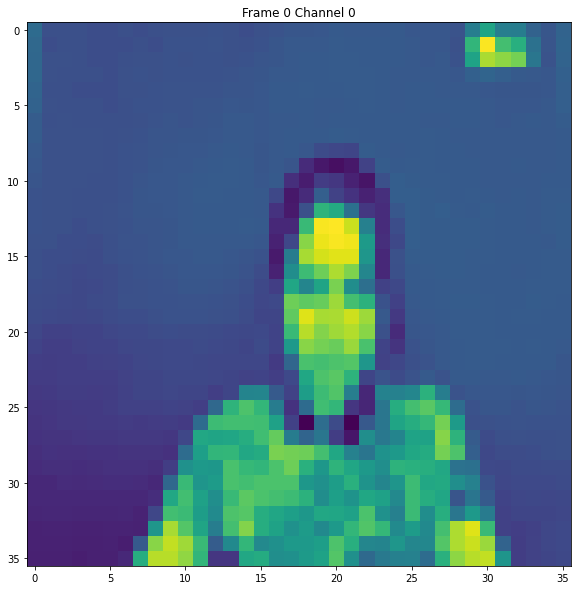

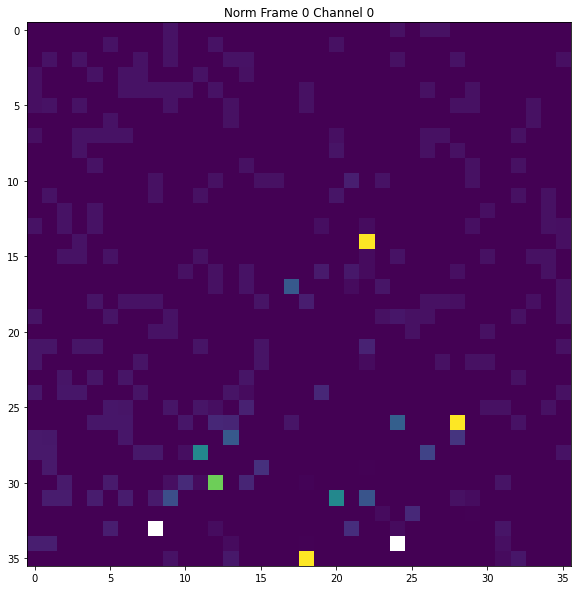

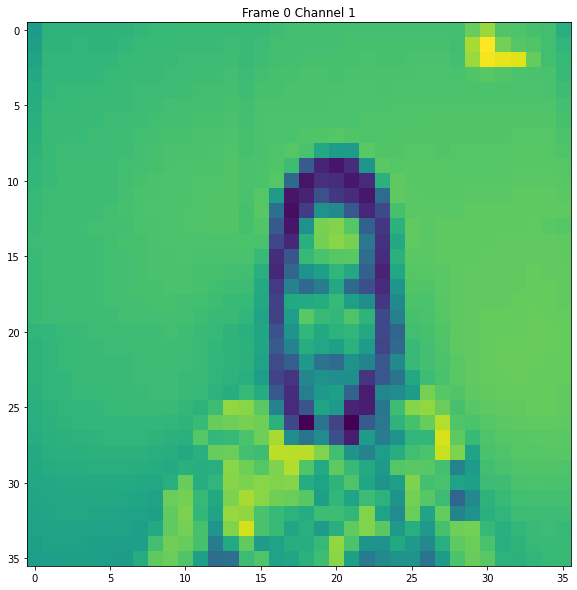

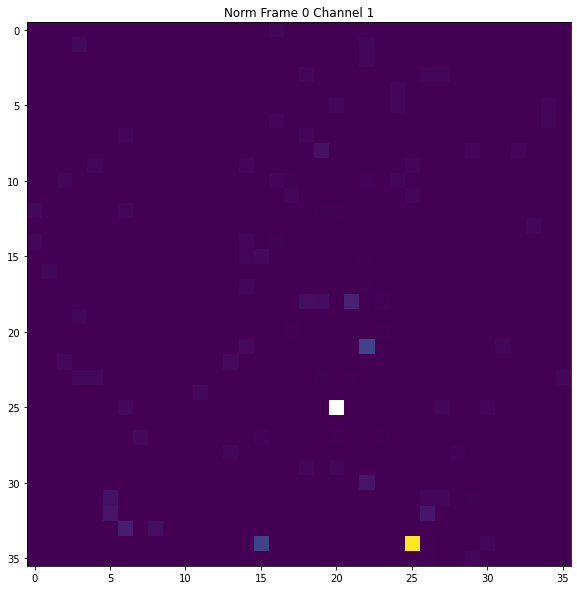

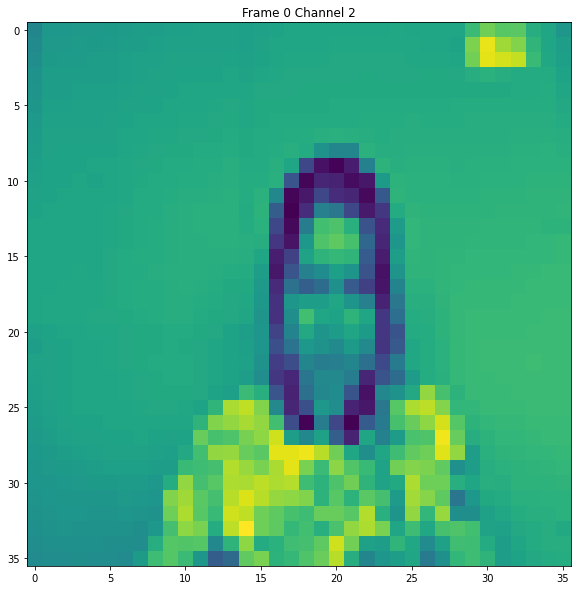

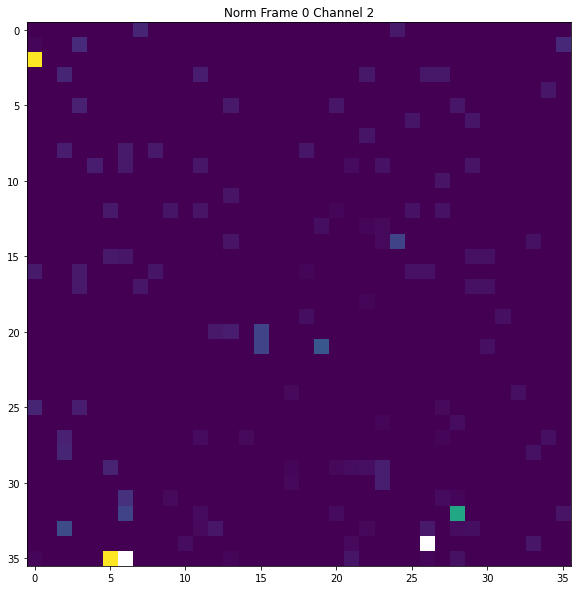

In [20]:
# Get iterate over different subjects
imageDirs = iglob("D:\\OneDrive\\Documents\\rPPG-Projects\\Datasets-Preprocessed\\UBFC2\\DATASET_2\\[0-9]*\\subject[0-9]*")
# imagePaths = iglob("D:\\OneDrive\\Documents\\rPPG-Projects\\Datasets-Preprocessed\\UBFC2\\DATASET_2\\[0-9]*\\subject[0-9]*\\[0-9]*.png")

images, labels = [], []

# For each subject
for path_ in imageDirs:
    print(f"[INFO] Working in {path_}")

    # Get the number of frames
    num_images = len(os.listdir(path_))

    print(f'[INFO] Number of images: {num_images}')
    
    # Get the path to the frames
    imagesPath = iglob(os.path.join(path_, "*.png"))

    # Get subject number from path
    subID = path_.split("\\")[-1]

    # Get the path to the csv file
    gtPath = path_.replace(subID, r"0\phys.csv")    

    images, labels = read_many_disk(num_images, imagesPath, gtPath)    

    break   # Testing only for first subject (for now)


print(f'shape of images: {np.shape(images)}, type: {type(images)}')
print(f'shape of labels: {np.shape(labels)}, type: {type(labels)}')


TODO: 

- Store the images and labels in a hdf5 file (one file for each subject)
- View the image at color channels and normalized channels [Follow this](https://www.analyticsvidhya.com/blog/2021/05/image-processing-using-numpy-with-practical-implementation-and-code/#h2_8)


In [21]:
# Get iterate over different subjects
datasetPath = r"D:\OneDrive\Documents\rPPG-Projects\Datasets-Preprocessed\UBFC2\DATASET_2"

# For each subject
for path_ in imageDirs:
    print(f"[INFO] Working in {path_}")

    # Get the number of frames
    num_images = len(os.listdir(path_))

    print(f'[INFO] Number of images: {num_images}')
    
    # Get the path to the frames
    imagesPath = iglob(os.path.join(path_, "*.png"))

    # For each frame
    
    # print(f'[INFO] Image paths: {imagePaths.__next__()}')
    
    break

[INFO] Working in D:\OneDrive\Documents\rPPG-Projects\Datasets-Preprocessed\UBFC2\DATASET_2\10\subject10
[INFO] Number of images: 2024
